# Question 1

In [20]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
import pandas as pd
from scipy.linalg import eigh


np.random.seed(99)

### Part A

In [21]:
# constants
num_samples = 10000
num_dim = 4
num_labels = 2
priors = np.array([0.35, 0.65])

# parameters of class-conditional Gaussians pdfs
mean0 = np.array([-1,-1,-1,-1])
cov0 = np.array([[2, -0.5, 0.3, 0], [-0.5, 1, -0.5, 0], [0.3, -0.5, 1, 0], [0, 0, 0, 2]])
mean1 = np.array([1, 1, 1, 1])
cov1 = np.array([[1, 0.3, -0.2, 0], [0.3, 2, 0.3, 0], [-0.2, 0.3, 1, 0], [0, 0, 0, 3]])

mean = np.array([mean0, mean1])
cov = np.array([cov0, cov1])

# generate samples
class_labels = np.random.choice(a=[0,1], size=num_samples, p=priors)
x = np.zeros(shape=[num_samples, num_dim])
for i in range(num_samples):
    x[i,:] = np.random.multivariate_normal(mean[class_labels[i]], cov[class_labels[i]])

# posterior pdf
pdf_x_given_l0 = multivariate_normal.pdf(x, mean=mean[0], cov=cov[0])
pdf_x_given_l1 = multivariate_normal.pdf(x, mean=mean[1], cov=cov[1])

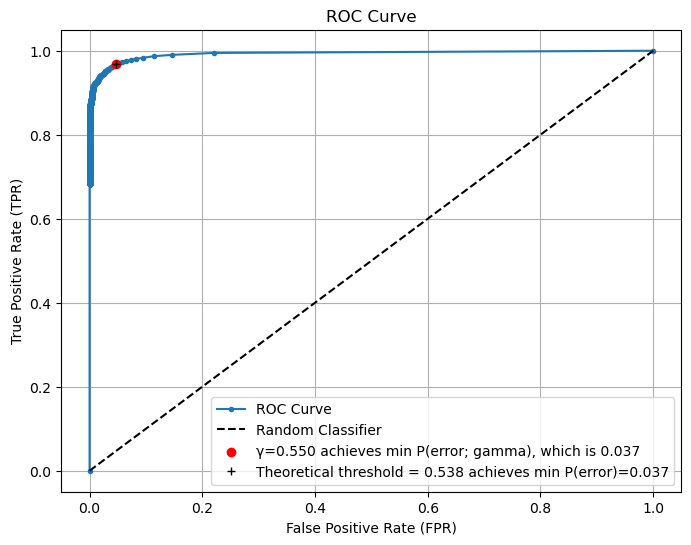

In [15]:
gamma_values = np.linspace(start=0, stop=1000, num=20000)
gamma_values = np.append(gamma_values, np.inf)

# For every gamma, we compute the TPR, FPR and probabilities of error
TPRs = []
FPRs = []
prob_errors = []

for gamma in gamma_values:
    ratio = pdf_x_given_l1/pdf_x_given_l0
    decisions = ratio > gamma # np array of 1,0 decisions
    
    TP = np.sum((decisions == 1) & (class_labels == 1))
    FP = np.sum((decisions == 1) & (class_labels == 0))
    FN = np.sum((decisions == 0) & (class_labels == 1))
    TN = np.sum((decisions == 0) & (class_labels == 0))

    TPR = TP/(TP+FN) # true positive detection probability
    FPR = FP/(FP+TN) # false positive probability
    FNR = FN/(FN+TP)
    prob_error = FPR * priors[0] + FNR * priors[1]

    TPRs.append(TPR)
    FPRs.append(FPR)
    prob_errors.append(prob_error)

min_prob_error = min(prob_errors)
optimal_gamma_index = prob_errors.index(min_prob_error)
optimal_gamma = gamma_values[optimal_gamma_index]

# theoretical optimal gamma
decisions_theo = (pdf_x_given_l1/pdf_x_given_l0) > priors[0]/priors[1] # np array of 1,0 decisions

TP_theo = np.sum((decisions_theo == 1) & (class_labels == 1))
FP_theo = np.sum((decisions_theo == 1) & (class_labels == 0))
FN_theo = np.sum((decisions_theo == 0) & (class_labels == 1))
TN_theo = np.sum((decisions_theo == 0) & (class_labels == 0))

TPR_theo = TP_theo/(TP_theo+FN_theo) # true positive detection probability
FPR_theo = FP_theo/(FP_theo+TN_theo) # false positive probability
FNR_theo = FN_theo/(FN_theo+TP_theo)
prob_error_theo = FPR_theo * priors[0] + FNR_theo * priors[1]

# Plotting the ROC Curve and highlighting the optimal gamma
plt.figure(figsize=(8, 6))
plt.plot(FPRs, TPRs, label='ROC Curve', marker = '.', zorder=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')  # Dashed diagonal line (random classifier)
plt.scatter(FPRs[optimal_gamma_index], TPRs[optimal_gamma_index], color='red', zorder=3, label=f'γ={optimal_gamma:.3f} achieves min P(error; gamma), which is {min_prob_error:.3f}')
plt.plot(FPR_theo, TPR_theo, '+', label=f'Theoretical threshold = {priors[0]/priors[1]:.3f} achieves min P(error)={prob_error_theo:.3f}', color = 'black', zorder=4)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


### Part B

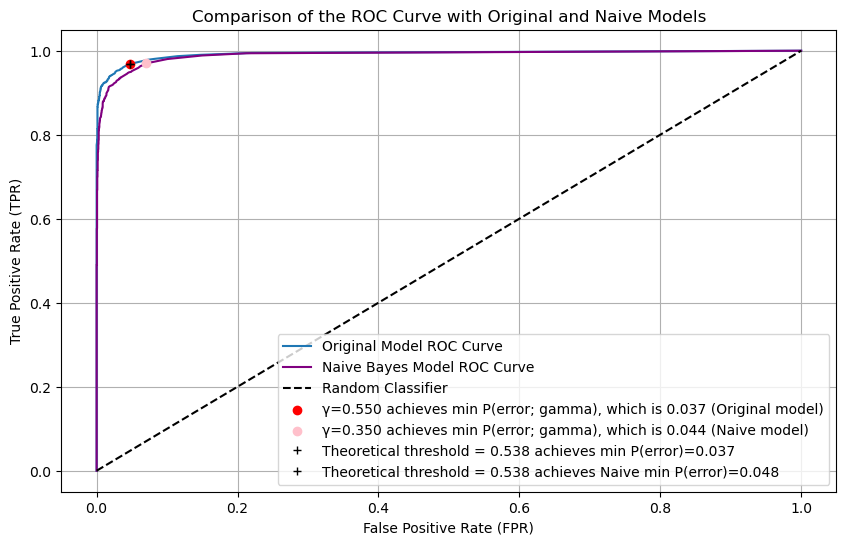

In [16]:
# naive covariance matrices
cov0_naive = np.diag(np.diag(cov0))
cov1_naive = np.diag(np.diag(cov1))

mean = np.array([mean0, mean1])
cov_naive = np.array([cov0_naive, cov1_naive])

# posterior pdf
pdf_x_given_l0_naive = multivariate_normal.pdf(x, mean=mean[0], cov=cov_naive[0])
pdf_x_given_l1_naive = multivariate_normal.pdf(x, mean=mean[1], cov=cov_naive[1])

# For every gamma, we compute the TPR, FPR and probabilities of error
TPRs_naive = []
FPRs_naive = []
prob_errors_naive = []

for gamma in gamma_values:
    ratio = pdf_x_given_l1_naive/pdf_x_given_l0_naive
    decisions = ratio > gamma # np array of 1,0 decisions
    
    TP = np.sum((decisions == 1) & (class_labels == 1))
    FP = np.sum((decisions == 1) & (class_labels == 0))
    FN = np.sum((decisions == 0) & (class_labels == 1))
    TN = np.sum((decisions == 0) & (class_labels == 0))

    TPR = TP/(TP+FN) # true positive detection probability
    FPR = FP/(FP+TN) # false positive probability
    FNR = FN/(FN+TP)
    prob_error = FPR * priors[0] + FNR * priors[1]

    TPRs_naive.append(TPR)
    FPRs_naive.append(FPR)
    prob_errors_naive.append(prob_error)

min_prob_error_naive = min(prob_errors_naive)
optimal_gamma_index_naive = prob_errors_naive.index(min_prob_error_naive)
optimal_gamma_naive = gamma_values[optimal_gamma_index_naive]

# theoretical optimal gamma
decisions_naive_theo = (pdf_x_given_l1_naive/pdf_x_given_l0_naive) > priors[0]/priors[1] # np array of 1,0 decisions

TP_naive_theo = np.sum((decisions_naive_theo == 1) & (class_labels == 1))
FP_naive_theo = np.sum((decisions_naive_theo == 1) & (class_labels == 0))
FN_naive_theo = np.sum((decisions_naive_theo == 0) & (class_labels == 1))
TN_naive_theo = np.sum((decisions_naive_theo == 0) & (class_labels == 0))

TPR_naive_theo = TP_naive_theo/(TP_naive_theo+FN_naive_theo) # true positive detection probability
FPR_naive_theo = FP_naive_theo/(FP_naive_theo+TN_naive_theo) # false positive probability
FNR_naive_theo = FN_naive_theo/(FN_naive_theo+TP_naive_theo)
prob_error_naive_theo = FPR_naive_theo * priors[0] + FNR_naive_theo * priors[1]

# Plotting the ROC Curve and highlighting the optimal gamma
plt.figure(figsize=(10, 6))
plt.plot(FPRs, TPRs, label='Original Model ROC Curve', zorder=2)
plt.plot(FPRs_naive, TPRs_naive, label='Naive Bayes Model ROC Curve', zorder=2, color = 'purple')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')  # Dashed diagonal line (random classifier)
plt.scatter(FPRs[optimal_gamma_index], TPRs[optimal_gamma_index], color='red', zorder=3, label=f'γ={optimal_gamma:.3f} achieves min P(error; gamma), which is {min_prob_error:.3f} (Original model)')
plt.scatter(FPRs_naive[optimal_gamma_index_naive], TPRs_naive[optimal_gamma_index_naive], color='pink', zorder=3, label=f'γ={optimal_gamma_naive:.3f} achieves min P(error; gamma), which is {min_prob_error_naive:.3f} (Naive model)')
plt.plot(FPR_theo, TPR_theo, '+', label=f'Theoretical threshold = {priors[0]/priors[1]:.3f} achieves min P(error)={prob_error_theo:.3f}', color = 'black', zorder=4)
plt.plot(FPR_theo, TPR_theo, '+', label=f'Theoretical threshold = {priors[0]/priors[1]:.3f} achieves Naive min P(error)={prob_error_naive_theo:.3f}', color = 'black', zorder=4)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Comparison of the ROC Curve with Original and Naive Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()





### Part C

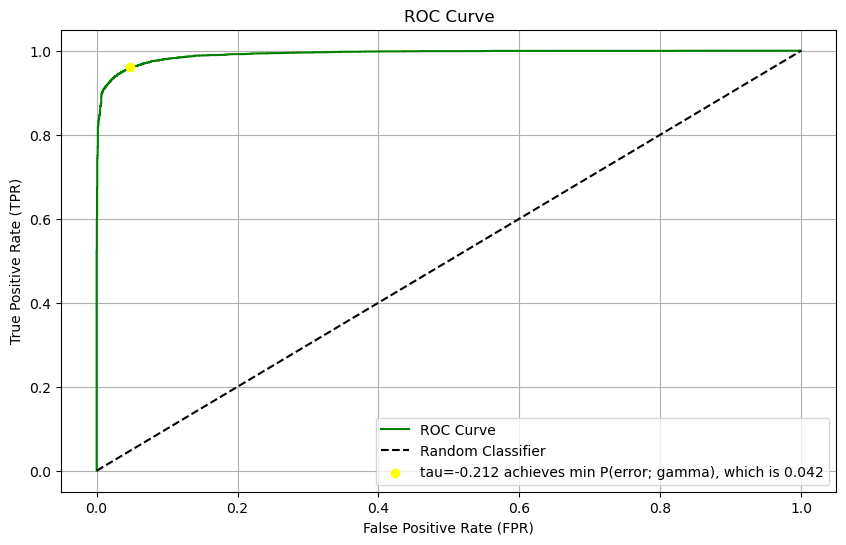

In [23]:
# data samples x and its class labels have been generated in part A
# estimate the parameters (mean and covariance) from the generated data (average estimators)

indices_class0 = np.where(class_labels == 0)
indices_class1 = np.where(class_labels == 1)

estimated_mean0 = x[indices_class0].mean(axis=0)
estimated_mean1 = x[indices_class1].mean(axis=0)

estimated_cov0 = np.cov(x[indices_class0], rowvar=False)
estimated_cov1 = np.cov(x[indices_class1], rowvar=False)

# calculate between class scatter matrix
sb = np.outer(estimated_mean0 - estimated_mean1, estimated_mean0 - estimated_mean1)
# calculate within class scatter matrix
sw = estimated_cov0 + estimated_cov1
# Calculating eigenvalues and eigenvectors
# eigh computes the eigenvalues and eigenvectors of a matrix (or two matrices in the generalized case). 
# It is used here to solve the generalized eigenvalue problem: sb*w = lambda*sw*w
_, eigvec = eigh(sb, sw)

# eigh returns the eigenvalues in ascending order
w_LDA = eigvec[:, -1]

lda_discriminant_scores = np.dot(x, w_LDA)
sort_scores = np.sort(lda_discriminant_scores)

#compute threshold values as mid points between scores
tau_sweep = []

for i in range(0,9999):
    tau_sweep.append((sort_scores[i] + sort_scores[i+1])/2.0)

decision_lda = []
TPRs_lda = [None] * len(tau_sweep)
FPRs_lda = [None] * len(tau_sweep)
FNRs_lda = [None] * len(tau_sweep)
prob_errors_lda = [None] * len(tau_sweep)

for (i, tau) in enumerate(tau_sweep):
    decision_lda = (lda_discriminant_scores >= tau)
    TPRs_lda[i] = (np.size(np.where((decision_lda == 1) & (class_labels == 1)))/np.size(np.where(class_labels == 1)))
    FPRs_lda[i] = (np.size(np.where((decision_lda == 1) & (class_labels == 0)))/np.size(np.where(class_labels == 0)))

    prob_errors_lda[i] = FPRs_lda[i] * priors[0] + (1 - TPRs_lda[i]) * priors[1]

# Plotting the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(FPRs_lda, TPRs_lda, label='ROC Curve', zorder=2, color = 'green')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')  # Dashed diagonal line (random classifier)
plt.scatter(FPRs_lda[np.argmin(prob_errors_lda)], TPRs_lda[np.argmin(prob_errors_lda)], color='yellow', zorder=3, label=f'tau={tau_sweep[np.argmin(prob_errors_lda)]:.3f} achieves min P(error; gamma), which is {np.min(prob_errors_lda):.3f}')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()




    

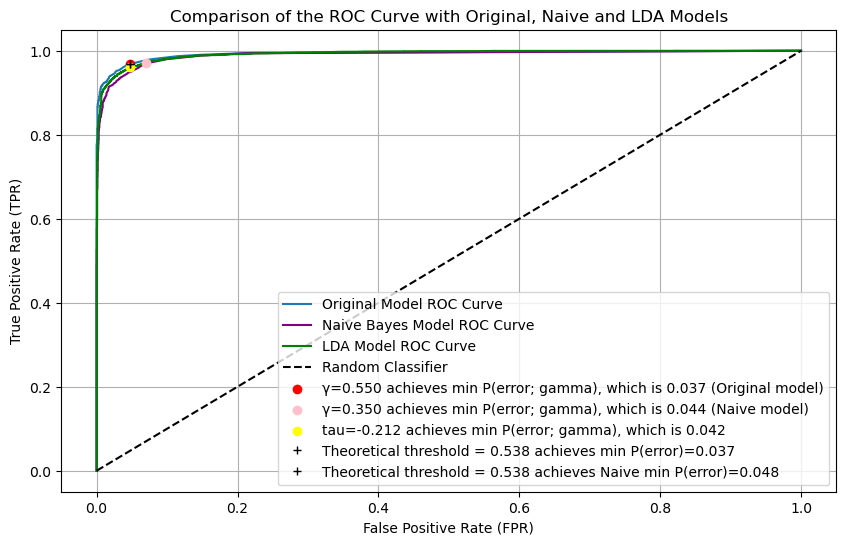

In [26]:
# Combined ROC curve
plt.figure(figsize=(10, 6))
plt.plot(FPRs, TPRs, label='Original Model ROC Curve', zorder=2)
plt.plot(FPRs_naive, TPRs_naive, label='Naive Bayes Model ROC Curve', zorder=2, color = 'purple')
plt.plot(FPRs_lda, TPRs_lda, label='LDA Model ROC Curve', zorder=2, color = 'green')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')  # Dashed diagonal line (random classifier)
plt.scatter(FPRs[optimal_gamma_index], TPRs[optimal_gamma_index], color='red', zorder=3, label=f'γ={optimal_gamma:.3f} achieves min P(error; gamma), which is {min_prob_error:.3f} (Original model)')
plt.scatter(FPRs_naive[optimal_gamma_index_naive], TPRs_naive[optimal_gamma_index_naive], color='pink', zorder=3, label=f'γ={optimal_gamma_naive:.3f} achieves min P(error; gamma), which is {min_prob_error_naive:.3f} (Naive model)')
plt.scatter(FPRs_lda[np.argmin(prob_errors_lda)], TPRs_lda[np.argmin(prob_errors_lda)], color='yellow', zorder=3, label=f'tau={tau_sweep[np.argmin(prob_errors_lda)]:.3f} achieves min P(error; gamma), which is {np.min(prob_errors_lda):.3f}')
plt.plot(FPR_theo, TPR_theo, '+', label=f'Theoretical threshold = {priors[0]/priors[1]:.3f} achieves min P(error)={prob_error_theo:.3f}', color = 'black', zorder=4)
plt.plot(FPR_theo, TPR_theo, '+', label=f'Theoretical threshold = {priors[0]/priors[1]:.3f} achieves Naive min P(error)={prob_error_naive_theo:.3f}', color = 'black', zorder=4)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Comparison of the ROC Curve with Original, Naive and LDA Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

